In [303]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft YaHei'
import os
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

在开头首先导入NumPy、Pandas和Matplotlib等必要的数据处理和可视化库。
同时因为要在可视化中输出中文，将设置Matplotlib的字体为微软雅黑，以便在图表中显示，防止出现无法显示的情况

In [304]:
dataset = pd.read_csv('/机器学习/大作业/breast cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


在该部分，导入Pandas库并使用read_csv()函数读取CSV格式的数据集。
然后将读取的数据集存储在变量dataset中，通过dataset.head()方法查看数据集的前几行，默认为前5行。

In [305]:
X = dataset.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
y = dataset.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


读取到数据集后，从数据集中提取特定部分作为特征（X）和目标变量（y）。
使用train_test_split函数将数据集划分为训练集（X_train, y_train）和测试集（X_test, y_test），其中test_size参数指定测试集占比，random_state参数确保结果的可重复性。
再使用StandardScaler对训练集和测试集进行数据标准化处理，确保特征数据具有相同的尺度，有利于模型训练和性能评估。

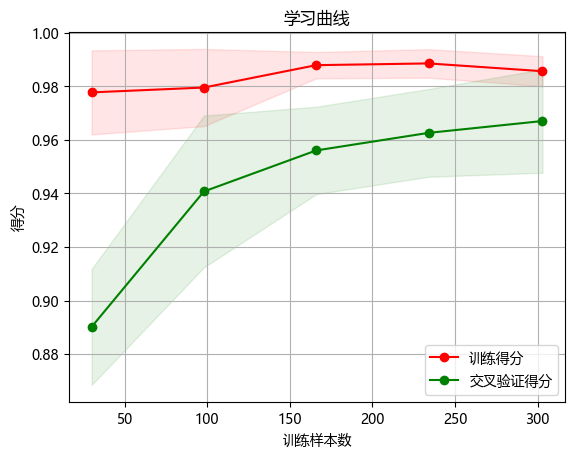

<Figure size 640x480 with 0 Axes>

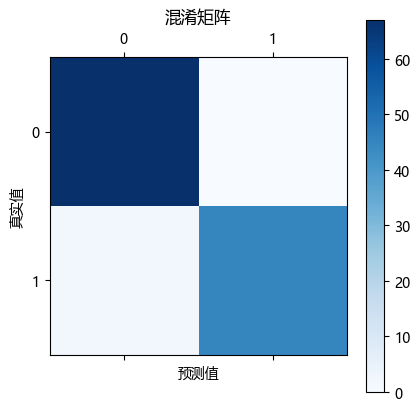

精确度： 0.9824561403508771
分类报告：
               precision    recall  f1-score   support

           B       0.97      1.00      0.99        67
           M       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

最佳参数: {'lasso__alpha': 0.01, 'lr__alpha': 10.0, 'svc__C': 10, 'svc__gamma': 0.01}
最佳得分: 0.9714767050075519


In [306]:
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.svm import SVC

first_layer_classifiers = [
    ('xgbr', XGBClassifier(max_depth=10, subsample=0.8, min_child_weight=1, n_estimators=50, use_label_encoder=False, eval_metric='logloss')),
    ('dtr', DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10)),
    ('adbr', AdaBoostClassifier(random_state=42, n_estimators=200, learning_rate=0.5)),
    ('gbrt', HistGradientBoostingClassifier(random_state=42, max_iter=100, learning_rate=0.1)),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15))
]

final_layer = StackingClassifier(
    estimators=first_layer_classifiers,
    final_estimator=RidgeClassifier(alpha=1.0),
    passthrough=True,
    n_jobs=-1
)

second_layer_classifiers = [
    ('lr', RidgeClassifier(alpha=1.0)),
    ('lasso', Lasso(alpha=0.1, random_state=42)),
    ('svc', SVC(C=1, gamma=1e-6, kernel='rbf', probability=True))
]

multi_layer_Classifier = StackingClassifier(
    estimators=second_layer_classifiers,
    final_estimator=final_layer,
    passthrough=False,
    n_jobs=-1
)

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [1e-6, 1e-4, 1e-2],
    'lasso__alpha': [0.01, 0.1, 1.0],
    'lr__alpha': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(multi_layer_Classifier, param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("训练样本数")
    plt.ylabel("得分")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="训练得分")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="交叉验证得分")

    plt.legend(loc="best")
    return plt

plot_learning_curve(best_model, "学习曲线", X_train, y_train, cv=3, n_jobs=-1)
plt.show()

plt.figure()
cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.title('混淆矩阵')
plt.show()

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("精确度：", accuracy)
print("分类报告：\n", classification_report(y_test, y_pred))
print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)

1. 在本部分的开头导入了一些必要的库和模型：如learning_curve, train_test_split, GridSearchCV等用于模型评估和调优的相关库和accuracy_score, confusion_matrix, classification_report等评估指标的库，以及HistGradientBoostingClassifier, StackingClassifier, AdaBoostClassifier, RandomForestClassifier等机器学习相关的模型。
2. 在第一层分类器中使用了多种算法和模型：XGBClassifier：XGBoost算法，通过集成多个决策树来提高预测性能。DecisionTreeClassifier：决策树算法，通过对特征进行递归划分来进行分类。AdaBoostClassifier：AdaBoost算法，通过组合多个弱分类器来构建一个强分类器。HistGradientBoostingClassifier：基于直方图的梯度提升树算法，针对大规模数据集进行了优化。RandomForestClassifier：随机森林算法，通过多个决策树的投票来进行分类。
3. 在第二层分类器中：RidgeClassifier岭回归算法，对线性回归的系数引入了L2正则化，避免过拟合。Lasso：Lasso回归算法，对线性回归的系数引入了L1正则化，可以用于特征选择.SVC：支持向量机算法，通过在高维空间中构建最优超平面来进行分类。
4. 使用StackingClassifier将第二层分类器进行整合，并将最终分类器指定为之前定义的final_layer。这种层级结构的模型通常能够在各种数据集上取得较好的性能，因为它能够充分利用不同分类器的优点，并通过集成的方式来弥补各个分类器的缺点，从而提高整体预测性能。
5. 使用GridSearchCV来实现网格搜索，指定了参数空间param_grid。param_grid定义了多个参数及其取值范围，包括'svc__C'、'svc__gamma'、'lasso__alpha'和'lr__alpha'。这些参数分别对应于SVC、Lasso、RidgeClassifier模型的超参数。GridSearchCV会在参数空间中进行交叉验证，并选择在交叉验证中性能最好的参数组合。
6. 在最后，plot_learning_curve函数用于绘制学习曲线，以展示模型在训练集和交叉验证集上随着训练样本数的增加而变化的得分情况。
图中的横轴是训练样本数，纵轴是得分。
填充区域代表得分的方差。
plt.matshow函数用于展示混淆矩阵的热力图，颜色的深浅表示不同类别的分类情况，越深色表示分类越准确。
classification_report函数用于生成分类模型的详细报告，包括每个类别的精确度、召回率、F1分数和支持数等指标。

